<div id="container" style="position:relative;">
<div style="position:center; float:left"><h1>04 - CryptoPunk Price Prediction<br>Model Selection and Implementation </h1></div>
<div style="position:relative; float:right"> 

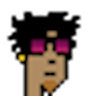
</div>


<hr> </hr>
Madelyn Goodman <br>
Brainstation Winter 2022 Capstone <br>
April 4, 2022

# Introduction

In notebook 03-CryptoPunk Price Prediction Model Constructon, I tested several different supervised learning models and neural network architectures and evaluated them based on their R2 scores. 5 neural networks met my performance threshold of an R2 score at or above 0.65 to compare against eachother in this notebook. 

The best supervised learning model had an R2 of 0.84, therefore, this was also tested against the best neural network for final model selection. 

There are several factors in the Keras package that can contribute to randomness in running neural network models that can result in slightly different R2 scores of models with the same architecture. Here I took the best performing neural network models with similar accuracy scores and ran them 15 times each and plotted their R2 accuracies against model run and compared them to each other to select the best performing model. 

I took this model and ran the test data on the best performing neural network and the random forest model to select the best model for predicting prices of CryptoPunks. 

Finally, I used this model to make price prediction on punk #8565 to demonstrate the ability of the model to predict sale prices. 

**Note**<br>
Since the method for neural network evaluation included running cells multiple times to collect accuracy scores in order to maintain this analysis this notebook should not be run from top to bottom. 
<hr>

In [200]:
# importing packages

#setting seeds
#setting a seed value 
seed_value = 789

#setting the PYTHONHASHSEED environment variable to be fixed
import os
#making an environment variable to access from anywhere
os.environ['PYTHONHASHSEED']=str(seed_value)

#setting the python built-in random generator to be fixed
import random
random.seed(seed_value)

#setting numpy random generator to be fixed
import numpy as np
np.random.seed(seed_value)

#setting tensorflow random generator to be fixed 
import tensorflow as tf
tf.random.set_seed(seed_value)

#configuring a global tensorflow session 
from tensorflow import keras
from tensorflow.keras import layers
#makes sure you don't run code on a GPU - might be randomness that GPUs inject
CUDA_VISIBLE_DEVICES=""

#importing other packages
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#importing supervised learning packages
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

#installing and importing joblib
!pip install joblib
import joblib

# Cleaning data for modeling

In [ ]:
#loading cleaned data

cp_sales = pd.read_csv('Data/punk_sales_data.csv')

In [ ]:
#viewing data
pd.set_option('display.max_columns', None)
cp_sales.head()

,Unnamed: 0,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.98
1,1,Sold,2017-06-23,larvalabs,0.00,544,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.347835,1,0,0.00
2,2,Sold,2017-06-23,larvalabs,0.25,1841,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.566622,1,0,0.25
3,3,Sold,2017-06-23,larvalabs,0.00,3134,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.324392,1,0,0.00
4,4,Sold,2017-06-23,larvalabs,0.06,4025,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.321051,1,0,0.06


In [ ]:
#dropping unamed column
cp_sales.drop('Unnamed: 0', inplace=True, axis=1)
cp_sales.head()

,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.98
1,Sold,2017-06-23,larvalabs,0.00,544,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.347835,1,0,0.00
2,Sold,2017-06-23,larvalabs,0.25,1841,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.566622,1,0,0.25
3,Sold,2017-06-23,larvalabs,0.00,3134,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.324392,1,0,0.00
4,Sold,2017-06-23,larvalabs,0.06,4025,326.99,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.321051,1,0,0.06


In [ ]:
#checking null values 
cp_sales.isna().sum().sum()

0

In [ ]:
#checking for duplicated rows 
cp_sales.duplicated().sum().sum()

0

In [ ]:
#sorting by date and punk
cp_sales.sort_values(['punk_id', 'date'], ascending=(True, True), inplace=True, ignore_index=True)
cp_sales.head()

,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
0,Sold,2017-06-23,larvalabs,0.98,0,326.99,0,0.00,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.98
1,Sold,2017-07-07,larvalabs,1.60,0,241.28,9,3.71,1,0.98,14,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,0.62
2,Sold,2018-11-30,larvalabs,25.00,0,111.65,1,1.60,2,1.60,525,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207,1,0,23.40
3,Sold,2017-06-26,larvalabs,0.42,1,252.99,4,0.23,0,0.00,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443,1,0,0.42
4,Sold,2019-04-06,larvalabs,31.00,1,165.79,4,1.38,1,0.42,652,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443,1,0,30.58


In [ ]:
#checking that the dates were sorted properly
cp_sales.tail()

,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
18938,Sold,2020-09-27,larvalabs,59.00,9997,357.55,6,10.13,0,0.0,1192,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.935381,1,0,59.00
18939,Sold,2021-02-08,larvalabs,99.99,9997,1752.98,1,0.00,1,59.0,1326,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.935381,1,0,40.99
18940,Sold,2020-12-27,larvalabs,15.00,9998,684.12,0,0.00,0,0.0,1283,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.579769,1,0,15.00
18941,Sold,2021-03-03,larvalabs,38.00,9998,1567.86,1,30.00,1,15.0,1349,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.579769,1,0,23.00
18942,Sold,2021-08-11,larvalabs,110.00,9998,3162.61,2,34.00,2,38.0,1510,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.579769,1,0,72.00


In [ ]:
#defining variables to drop that won't work in the model
todrop_model = ['txn_type', 'date', 'source', 'punk_id', 'larvalabs', 'opensea', 'price_delta']

In [ ]:
#dropping variables
cp_sales_model = cp_sales.drop(todrop_model, axis=1)
cp_sales_model.head()

,eth,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity
0,0.98,326.99,0,0.00,0,0.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207
1,1.60,241.28,9,3.71,1,0.98,14,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207
2,25.00,111.65,1,1.60,2,1.60,525,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.461207
3,0.42,252.99,4,0.23,0,0.00,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443
4,31.00,165.79,4,1.38,1,0.42,652,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.337443


# Splitting and prepping data for modeling 

In [ ]:
#prepping data
#splitting feature and target
X = cp_sales_model.drop('eth', axis=1)
y = cp_sales_model['eth']
print(X.shape)
print(y.shape)

#testing and validtion split  
from sklearn.model_selection import train_test_split

#test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=789)
#validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=789)

#scaling 
from sklearn.preprocessing import StandardScaler
cp_scaler = StandardScaler()
cp_scaler.fit(X_train)

X_train_s = cp_scaler.transform(X_train)
X_validation_s = cp_scaler.transform(X_validation)
X_test_s = cp_scaler.transform(X_test)

(18943, 101)
(18943,)


# Running each high performing neural network 15 times

## Model 5 with 50 epochs

In [ ]:
#instantiating an empty list to capture accuracy scores
model_5_r2 = []

In [ ]:
#Model 5

#create a sequential model 
model_5 = keras.Sequential()

#creating hidden layers
model_5.add(layers.Dense(101, activation='relu'))
model_5.add(layers.Dropout(rate=0.25))

#layers of the number of different feature types
model_5.add(layers.Dense(87, activation='relu'))
model_5.add(layers.Dense(9, activation='relu'))

#declaring the output layer 
model_5.add(layers.Dense(1))

#compile the model 
model_5.compile(
            #Optimizer
            optimizer=keras.optimizers.Adam(),
            #loss function to minimize - MSE is typically the best for regression networks
            loss=keras.losses.MeanSquaredError()
)

#running model 
history_5 = model_5.fit(X_train_s, y_train, epochs=50, verbose=0, validation_data=(X_validation_s, y_validation))

#scoring the model with the R2
y_pred_5 = model_5.predict(X_test_s)

from sklearn.metrics import r2_score
m5_r2score = r2_score(y_test,y_pred_5)

model_5_r2.append(m5_r2score)
model_5_r2

[0.7289457730973639,
 0.6417749324471482,
 0.5134763161200426,
 0.667596624153564,
 0.6557486864053419,
 0.74846451649354,
 0.6780567426745491,
 0.7189567021746655,
 0.6599770718114313,
 0.5754763222293355,
 0.6973823547320094,
 0.7060435165904924,
 0.718426107314346,
 0.5975275148214694,
 0.6806437249126338]

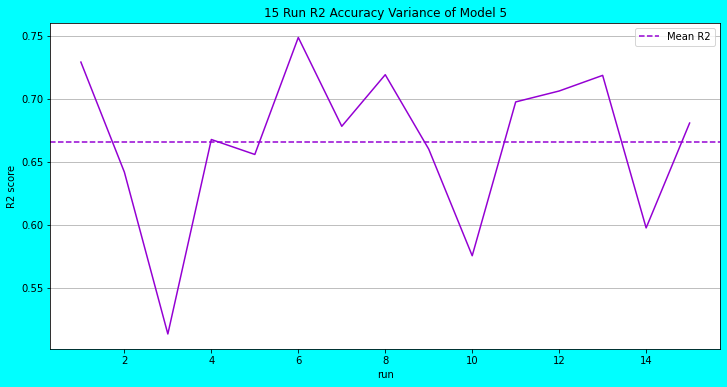

In [ ]:
#plotting the scores

fig = plt.figure(figsize=(12,6))
fig.set_facecolor('aqua')
fig.set_alpha(0.5)

plt.plot(np.arange(1,16), model_5_r2, c='darkviolet')
plt.axhline(y=(sum(model_5_r2)/len(model_5_r2)), linestyle='--', c='darkviolet', label='Mean R2')

plt.title('15 Run R2 Accuracy Variance of Model 5')
plt.xlabel('run')
plt.ylabel('R2 score')

plt.legend()
plt.grid(axis='y')

plt.show()

In [ ]:
#calculating the mean and variance of the scores

print('Mean R2 of Model 5 in 15 runs: ', round((sum(model_5_r2)/len(model_5_r2)),4))
print('Model 5 R2 variance in 15 runs: ', round(np.var(model_5_r2),4))

Mean R2 of Model 5 in 15 runs:  0.6659
Model 5 R2 variance in 15 runs:  0.0037


<hr>

Model 5's mean R2 of 0.67 is still very improssive. There appeared to be quite a bit of volatility of the R2 scores during training, however, a variance of 0.0037 of the R2 scores is quite low. 
<hr>

## Model 8 with 50 epochs

In [ ]:
#instantiating an empty list to collect accuracy scores
model_8_r2 = []

In [ ]:
#Model 8

#create a sequential model 
model_8 = keras.Sequential()

#creating hidden layers
model_8.add(layers.Dense(101, activation='relu'))
model_8.add(layers.Dropout(rate=0.25))

#layers of the number of different feature types
model_8.add(layers.Dense(87, activation='relu'))
model_8.add(layers.Dropout(rate=0.25))
model_8.add(layers.Dense(9, activation='relu'))
model_8.add(layers.Dropout(rate=0.25))
model_8.add(layers.Dense(92, activation='relu'))
model_8.add(layers.Dropout(rate=0.25))

#declaring the output layer 
model_8.add(layers.Dense(1))

#compile the model 
model_8.compile(
            #Optimizer
            optimizer=keras.optimizers.Adam(),
            #loss function to minimize - MSE is typically the best for regression networks
            loss=keras.losses.MeanSquaredError()
)

#running model 
history_8 = model_8.fit(X_train_s, y_train, epochs=50, verbose=0, validation_data=(X_validation_s, y_validation))

#scoring the model with R2
y_pred_8 = model_8.predict(X_validation_s)

m8_r2score = r2_score(y_test,y_pred_8)

model_8_r2.append(m8_r2score)
model_8_r2

[0.6538784859580153,
 0.6497089453229328,
 0.6486018370200013,
 0.6563909520277083,
 0.653259628021468,
 0.6653177857745884,
 0.6635501367749133,
 0.6610024065892899,
 0.649655505943135,
 0.5927707604016559,
 0.6125275951767291,
 0.6239509199527769,
 0.612528395791782,
 0.6325789396790037,
 0.6462485063587562]

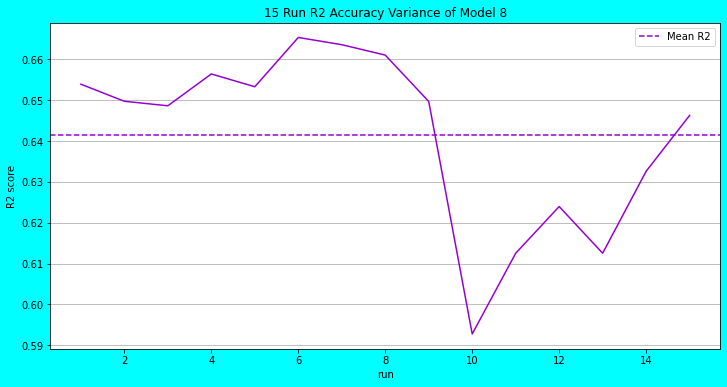

In [ ]:
#plotting the scores

fig = plt.figure(figsize=(12,6))
fig.set_facecolor('aqua')
fig.set_alpha(0.5)

plt.plot(np.arange(1,16), model_8_r2, c='darkviolet')
plt.axhline(y=(sum(model_8_r2)/len(model_8_r2)), linestyle='--', c='darkviolet', label='Mean R2')

plt.title('15 Run R2 Accuracy Variance of Model 8')
plt.xlabel('run')
plt.ylabel('R2 score')

plt.legend()
plt.grid(axis='y')

plt.show()

In [ ]:
#calculating the mean and variance of the scores

print('Mean R2 of Model 8 in 15 runs: ', round((sum(model_8_r2)/len(model_8_r2)),4))
print('Model 8 R2 variance in 15 runs: ', round(np.var(model_8_r2),4))

Mean R2 of Model 8 in 15 runs:  0.6415
Model 8 R2 variance in 15 runs:  0.0004


<hr>

This model overall did not perform as well as model 5 with a 0.1 margin since the mean R2 score for this model was 0.6451. The scores of this model, however, experienced very low variance around 0.0004.
<hr>

## Model 12 with 50 epochs

In [ ]:
#instantiating an empty list to collect accuracy scores
model_12_r2 = []

In [ ]:
#Model 12

#create a sequential model 
model_12 = keras.Sequential()

#creating hidden layers
model_12.add(layers.Dense(101, activation='relu'))
model_12.add(layers.Dropout(rate=0.20))

#layers of the number of different feature types
model_12.add(layers.Dense(87, activation='relu'))
model_12.add(layers.Dense(9, activation='relu'))
model_12.add(layers.Dense(101, activation='relu'))
model_12.add(layers.Dropout(rate=0.20))

#declaring the output layer 
model_12.add(layers.Dense(1))

#compile the model 
model_12.compile(
            #Optimizer
            optimizer=keras.optimizers.Adam(),
            #loss function to minimize - MSE is typically the best for regression networks
            loss=keras.losses.MeanSquaredError()
)

#running model 
history_12 = model_12.fit(X_train_s, y_train, epochs=50, verbose=0, validation_data=(X_validation_s, y_validation))

#scoring the model with the R2 score
y_pred_12 = model_12.predict(X_validation_s)

m12_r2score = r2_score(y_validation, y_pred_12)

#appending to the list of r2 scores
model_12_r2.append(m12_r2score)
model_12_r2

[0.7000347303574473,
 0.6515914718866312,
 0.5607177149975122,
 0.5950376245784791,
 0.7160755644724562,
 0.5838717668802351,
 0.6254357494841642,
 0.6834921648280465,
 0.6802044914738724,
 0.6940613058890821,
 0.6252382144823543,
 0.5847014463835086,
 0.7128502582833417,
 0.6534774413270206,
 0.709949632105204]

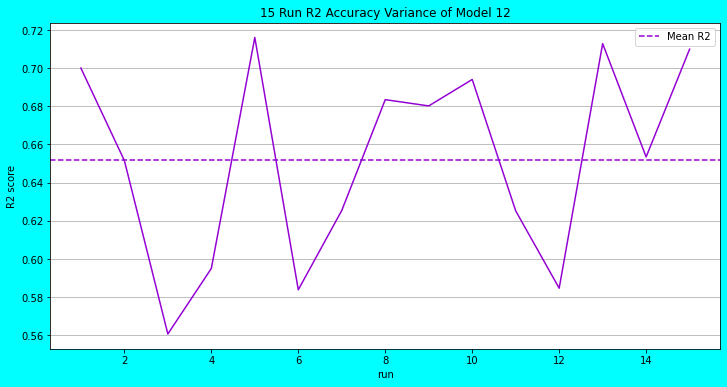

In [ ]:
#plotting the scores

fig = plt.figure(figsize=(12,6))
fig.set_facecolor('aqua')
fig.set_alpha(0.5)

plt.plot(np.arange(1,16), model_12_r2, c='darkviolet')
plt.axhline(y=(sum(model_12_r2)/len(model_12_r2)), linestyle='--', c='darkviolet', label='Mean R2')

plt.title('15 Run R2 Accuracy Variance of Model 12')
plt.xlabel('run')
plt.ylabel('R2 score')

plt.legend()
plt.grid(axis='y')

plt.show()

In [ ]:
#calculating the mean and variance of the scores

print('Mean R2 of Model 12 in 15 runs: ', round((sum(model_12_r2)/len(model_12_r2)),4))
print('Model 12 R2 variance in 15 runs: ', round(np.var(model_12_r2),4))

Mean R2 of Model 12 in 15 runs:  0.6518
Model 12 R2 variance in 15 runs:  0.0026


<hr>

Model 12 showed a comprable mean R2 -0.65- as with model 8, however, it did not perform better than model 5 on mean R2, but it's variance is less at 0.0026. 
<hr>

## Model 13 with 80 epochs

In [ ]:
#instantiating the list of scores
model_13_r2 = []

In [ ]:
#Model 13

#create a sequential model 
model_13 = keras.Sequential()

#creating hidden layers
model_13.add(layers.Dense(101, activation='relu'))
model_13.add(layers.Dropout(rate=0.25))

#layers of the number of different feature types
model_13.add(layers.Dense(87, activation='relu'))
model_13.add(layers.Dropout(rate=0.25))
model_13.add(layers.Dense(9, activation='relu'))
model_13.add(layers.Dense(5, activation='relu'))
model_13.add(layers.Dense(101, activation='relu'))
model_13.add(layers.Dropout(rate=0.25))

#declaring the output layer 
model_13.add(layers.Dense(1))

#compile the model 
model_13.compile(
            #Optimizer
            optimizer=keras.optimizers.Adam(),
            #loss function to minimize - MSE is typically the best for regression networks
            loss=keras.losses.MeanSquaredError()
)

#running model 
history_13 = model_13.fit(X_train_s, y_train, epochs=80, verbose=0, validation_data=(X_validation_s, y_validation))

#scoring the model with the R2 score
y_pred_13 = model_13.predict(X_validation_s)

m13_r2score = r2_score(y_validation,y_pred_13)

#appending to the list of r2 scores
model_13_r2.append(m13_r2score)
model_13_r2

[0.6607333378118843,
 0.6290270299778868,
 0.5564997005846699,
 0.685408418063132,
 0.7016928498215589,
 0.700545551844644,
 0.70175414263204,
 0.7070544663593055,
 0.7573707902249458,
 0.6572507006912531,
 0.721720244046546,
 0.7459749877864938,
 0.687019721252411,
 0.6456637875271515,
 0.6331630388886422]

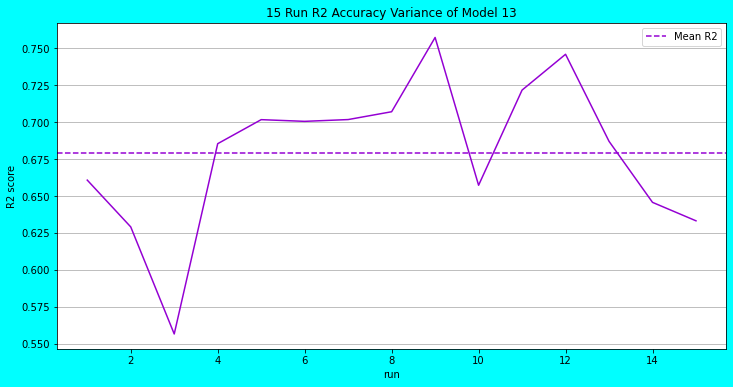

In [ ]:
#plotting the scores

fig = plt.figure(figsize=(12,6))
fig.set_facecolor('aqua')
fig.set_alpha(0.5)

plt.plot(np.arange(1,16), model_13_r2, c='darkviolet')
plt.axhline(y=(sum(model_13_r2)/len(model_13_r2)), linestyle='--', c='darkviolet', label='Mean R2')

plt.title('15 Run R2 Accuracy Variance of Model 13')
plt.xlabel('run')
plt.ylabel('R2 score')

plt.legend()
plt.grid(axis='y')

plt.show()

In [ ]:
#calculating the mean and variance of the scores

print('Mean R2 of Model 13 in 15 runs: ', round((sum(model_13_r2)/len(model_13_r2)),4))
print('Model 13 R2 variance in 15 runs: ', round(np.var(model_13_r2),4))

Mean R2 of Model 13 in 15 runs:  0.6794
Model 13 R2 variance in 15 runs:  0.0024


<hr>

Model 13 out performed Model 5 with an average R2 of 0.68 as well as less variance at 0.0024. 
<hr>

## Model 14 with 80 epochs

In [ ]:
#instantiating the list of scores
model_14_r2 = []

In [ ]:
#Model 14

#create a sequential model 
model_14 = keras.Sequential()

#creating hidden layers
model_14.add(layers.Dense(101, activation='relu'))
model_14.add(layers.Dropout(rate=0.25))

#layers of the number of different feature types
model_14.add(layers.Dense(9, activation='relu'))
model_14.add(layers.Dense(87, activation='relu'))
model_14.add(layers.Dropout(rate=0.25))
model_14.add(layers.Dense(5, activation='relu'))

#declaring the output layer 
model_14.add(layers.Dense(1))

#compile the model 
model_14.compile(
            #Optimizer
            optimizer=keras.optimizers.Adam(),
            #loss function to minimize - MSE is typically the best for regression networks
            loss=keras.losses.MeanSquaredError()
)

#running model 
history_14_80 = model_14.fit(X_train_s, y_train, epochs=80, verbose=0, validation_data=(X_validation_s, y_validation))

#scoring the model with the R2 score
y_pred_14_80 = model_14.predict(X_validation_s)

m14_r2score = r2_score(y_validation,y_pred_14_80)

#appending to the list of r2 scores
model_14_r2.append(m14_r2score)
model_14_r2

[0.6187129434715117,
 0.5294707822930742,
 0.6580035302434277,
 0.6752157290349509,
 0.648024274478128,
 0.6335866458561288,
 0.67596308127077,
 0.6221335299377337,
 0.6615216320946933,
 0.4803179630758808,
 0.7169746669684172,
 0.7101750849459261,
 0.6259761421756254,
 0.7400646624318437,
 0.6962725144417388]

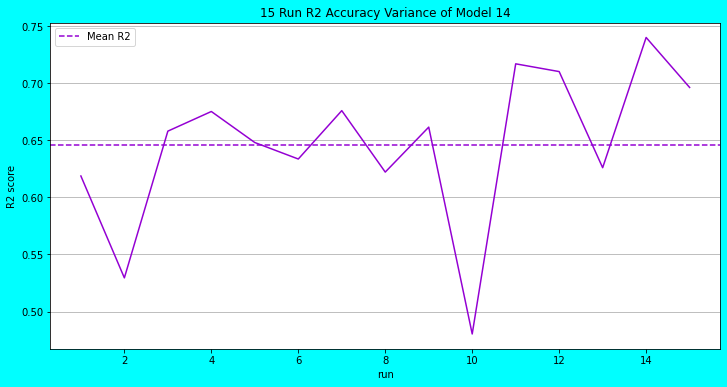

In [ ]:
#plotting the scores

fig = plt.figure(figsize=(12,6))
fig.set_facecolor('aqua')
fig.set_alpha(0.5)

plt.plot(np.arange(1,16), model_14_r2, c='darkviolet')
plt.axhline(y=(sum(model_14_r2)/len(model_14_r2)), linestyle='--', c='darkviolet', label='Mean R2')

plt.title('15 Run R2 Accuracy Variance of Model 14')
plt.xlabel('run')
plt.ylabel('R2 score')

plt.legend()
plt.grid(axis='y')

plt.show()

In [ ]:
#calculating the mean and variance of the scores

print('Mean R2 of Model 14 in 15 runs: ', round((sum(model_14_r2)/len(model_14_r2)),4))
print('Model 14 R2 variance in 15 runs: ', round(np.var(model_14_r2),4))

Mean R2 of Model 14 in 15 runs:  0.6462
Model 14 R2 variance in 15 runs:  0.0044


<hr>

With an R2 of 0.65, this model did not out perform model 13, especially since it had greater variance in scores of 0.0044.
<hr>

# Comparison and choosing the best neural network

<hr>

I organized the results from collecting the accuracies of the models from the 5 best neural networks into a single dataframe for ease of plotting with Plotly Express.
<hr>

In [ ]:
#compiling model 5 accuracy in a dataframe

num_runs = np.arange(1,16)
model_5_name = ['Model_5']*15

model_5_df = pd.DataFrame(data=list(zip(model_5_r2, num_runs, model_5_name)), 
                          columns=['accuracy', 'number of runs', 'model'])

model_5_df

,accuracy,number of runs,model
0,0.728946,1,Model_5
1,0.641775,2,Model_5
2,0.513476,3,Model_5
3,0.667597,4,Model_5
4,0.655749,5,Model_5
5,0.748465,6,Model_5
6,0.678057,7,Model_5
7,0.718957,8,Model_5
8,0.659977,9,Model_5
9,0.575476,10,Model_5


In [ ]:
#compiling model 8 accuracy in a dataframe

num_runs = np.arange(1,16)
model_8_name = ['Model_8']*15

model_8_df = pd.DataFrame(data=list(zip(model_8_r2, num_runs, model_8_name)), 
                          columns=['accuracy', 'number of runs', 'model'])

model_8_df

,accuracy,number of runs,model
0,0.653878,1,Model_8
1,0.649709,2,Model_8
2,0.648602,3,Model_8
3,0.656391,4,Model_8
4,0.653260,5,Model_8
5,0.665318,6,Model_8
6,0.663550,7,Model_8
7,0.661002,8,Model_8
8,0.649656,9,Model_8
9,0.592771,10,Model_8


In [ ]:
#compiling model 12 accuracy in a dataframe

num_runs = np.arange(1,16)
model_12_name = ['Model_12']*15

model_12_df = pd.DataFrame(data=list(zip(model_12_r2, num_runs, model_12_name)), 
                          columns=['accuracy', 'number of runs', 'model'])

model_12_df

,accuracy,number of runs,model
0,0.700035,1,Model_12
1,0.651591,2,Model_12
2,0.560718,3,Model_12
3,0.595038,4,Model_12
4,0.716076,5,Model_12
5,0.583872,6,Model_12
6,0.625436,7,Model_12
7,0.683492,8,Model_12
8,0.680204,9,Model_12
9,0.694061,10,Model_12


In [ ]:
#compiling model 13 accuracy in a dataframe

num_runs = np.arange(1,16)
model_13_name = ['Model_13']*15

model_13_df = pd.DataFrame(data=list(zip(model_13_r2, num_runs, model_13_name)), 
                          columns=['accuracy', 'number of runs', 'model'])

model_13_df

,accuracy,number of runs,model
0,0.660733,1,Model_13
1,0.629027,2,Model_13
2,0.556500,3,Model_13
3,0.685408,4,Model_13
4,0.701693,5,Model_13
5,0.700546,6,Model_13
6,0.701754,7,Model_13
7,0.707054,8,Model_13
8,0.757371,9,Model_13
9,0.657251,10,Model_13


In [ ]:
#compiling model 14 accuracy in a dataframe

num_runs = np.arange(1,16)
model_14_name = ['Model_14']*15

model_14_df = pd.DataFrame(data=list(zip(model_14_r2, num_runs, model_14_name)), 
                          columns=['accuracy', 'number of runs', 'model'])

model_14_df

,accuracy,number of runs,model
0,0.618713,1,Model_14
1,0.529471,2,Model_14
2,0.658004,3,Model_14
3,0.675216,4,Model_14
4,0.648024,5,Model_14
5,0.633587,6,Model_14
6,0.675963,7,Model_14
7,0.622134,8,Model_14
8,0.661522,9,Model_14
9,0.480318,10,Model_14


In [ ]:
model_acc_df = pd.concat([model_5_df, model_8_df, model_12_df, model_13_df, model_14_df], axis=0)
model_acc_df

,accuracy,number of runs,model
0,0.728946,1,Model_5
1,0.641775,2,Model_5
2,0.513476,3,Model_5
3,0.667597,4,Model_5
4,0.655749,5,Model_5
...,...,...,...
10,0.716975,11,Model_14
11,0.710175,12,Model_14
12,0.625976,13,Model_14
13,0.740065,14,Model_14


In [ ]:
fig = px.line(model_acc_df, x='number of runs', y='accuracy', color='model', 
              title='Top 5 Neural Network Model Accuracies in 15 Runs')
fig.show()

<hr>

This graph showed that Model 13 had the most consistently high accuracy. This model was pickled for future use and compared with the Random Forest Model built in notebook 03 using the test data.  
<hr>

In [ ]:
#saving Model 13

joblib.dump(model_13, 'generated_files/Neural_Network_13.pkl')

INFO:tensorflow:Assets written to: ram://88175023-e4ca-47ca-ae8f-f101031296c4/assets


['/content/drive/MyDrive/Brainstation/Capstone/MBG_Capstone_Code/Neural_Network_13.pkl']

# Evaluating Random Forest Regressor and Neural Network 13 on test data

In [ ]:
#loading random forest

RF_model = joblib.load(open('generated_files/RandomForest_model.pkl' ,'rb'))

In [ ]:
#scoring the random forest model with unscaled data
y_pred_RF = RF_model.predict(X_test)

r2_score(y_test, y_pred_RF)


0.8425749346947695

<hr>

The Random Forest model performed extremely well on the test data with an R2 of 0.84. 
<hr>

In [ ]:
#scoring Model 13
y_pred_13 = model_13.predict(X_test_s)

r2_score(y_test,y_pred_13)

0.6331630388886422

<hr>

The Neural Network also performed well with an R2 of 0.63, however, it did not show as good performance as the Random Forest model. 

Since the Random Forest model out performed the neural network, I selected this model to predict the sale prices of puk #8565 below.
<hr>

<div id="container" style="position:relative;">
<div style="position:center; float:left"><h1>Using the Random Forest Model to predict prices for CryptoPunk 8565</h1></div>
<div style="position:relative; float:right"> 

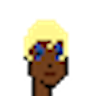
</div>

In [233]:
#pulling the data for punk 8565
cp_sales_8565 = cp_sales[cp_sales['punk_id']==8565]
cp_sales_8565

,txn_type,date,source,eth,punk_id,close,bid_count,mean_bid,num_prev_sales,prev_price,days_since_claim,whale_buy,whale_sell,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,buck teeth,cap,cap forward,chinstrap,choker,cigarette,classic shades,clown eyes blue,clown eyes green,clown hair green,clown nose,cowboy hat,crazy hair,dark hair,do-rag,earring,eye mask,eye patch,fedora,front beard,front beard dark,frown,frumpy hair,goat,gold chain,green eye shadow,half shaved,handlebars,headband,hoodie,horned rim glasses,hot lipstick,knitted cap,luxurious beard,medical mask,messy hair,mohawk,mohawk dark,mohawk thin,mole,mustache,muttonchops,nerd glasses,normal beard,normal beard black,orange side,peak spike,pigtails,pilot helmet,pink with hat,pipe,police cap,purple eye shadow,purple hair,purple lipstick,red mohawk,regular shades,rosy cheeks,shadow beard,shaved head,silver chain,small shades,smile,spots,straight hair,straight hair blonde,straight hair dark,stringy hair,tassle hat,tiara,top hat,vampire hair,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,alien,ape,female,male,zombie,punk_rarity,larvalabs,opensea,price_delta
16008,Sold,2021-05-03,larvalabs,25.25,8565,3433.99,1,24.50,0,0.00,1410,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255,1,0,25.25
16009,Sold,2021-05-04,larvalabs,25.75,8565,3240.01,2,24.88,1,25.25,1411,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255,1,0,0.50
16010,Sold,2021-08-01,larvalabs,31.90,8565,2555.43,3,25.17,2,25.75,1500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255,1,0,6.15
16011,Sold,2021-08-23,larvalabs,79.00,8565,3323.12,4,26.85,3,31.90,1522,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.618255,1,0,47.10


In [240]:
#creating dataframe of the sale prices of 8565 to compare predictions to

cp_sales_8565_eth = pd.DataFrame(cp_sales_8565['eth'])
cp_sales_8565_eth.reset_index(inplace=True)
cp_sales_8565_eth

,index,eth
0,16008,25.25
1,16009,25.75
2,16010,31.90
3,16011,79.00


<hr>

As data does not need to be scaled for Random Forest models, I did not include this in my data preparation for final testing. 
<hr>

In [242]:
#prepping data for the model

#dropping vairables not used in modeling
cp_sales_8565.drop(todrop_model, axis=1, inplace=True)

#splitting feature and target
X = cp_sales_8565.drop('eth', axis=1)
y = cp_sales_8565['eth']
print(X.shape)
print(y.shape)


(4, 101)
(4,)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [252]:
#saving predictions in a dataframe to compare to actual sale prices
RF_8565_pred = pd.DataFrame(RF_model.predict(X), columns=['predicted_eth'])

In [254]:
#concatonating actual sale prices and predicted sale prices
RF_8565 = pd.concat([cp_sales_8565_eth, RF_8565_pred], axis=1)
RF_8565.drop('index', axis=1, inplace=True)
RF_8565

,eth,predicted_eth
0,25.25,25.542993
1,25.75,27.817275
2,31.90,34.559022
3,79.00,71.327791


<hr>

As shown above, the random forest model can predict the sale price of the punk very closely. This model can be used to inform smart bidding decisions on punk sales.  
<hr>

# Conclusions

In this notebook I evaluated my best performing neural networks against eachother by taking the means of 15 runs of each to account for factors of randomness found in Keras when running neural networks. Model 13 performed the best among these neural networks and was used for comparison to the Random Forest regressor. 

With R2 scores of 0.63 and 0.84 for the best neural network and random forest regressor respectively, the random forest regressor proved to make the most accurate sale price predictions of all models tested. 

Predicting prices for punk #8565 with the random forest regressor, the margins of difference between actual and predicted price are very low, giving me confidence that this model would be best for informing smart bidding decision making.  
<hr>

# Data Dictionary

* `txn_type`: In the final dataset, this feature is all "Sold." This was kept to ensure that only data on sales was being used in the analysis. This feature was always removed when building and running models. 
* `date`: The date of the sale. This feature was used during EDA but was removed for model building and running. 
* `source`: This specifies the source of the transaction data. This data was compiled from sales through Larva Labs, the creators of CryptoPunks, and Opensea, one of the largest NFT trading platforms. 
* `eth`: The price the CryptoPunk sold for in Ether, the native cryptocurrency to the Ethereum blockchain. 
* `punk_id`: The unique ID of a CryptoPunk denotes the order it was minted in.
* `close`: The closing price of ETH in USD for the date of the sale. 
* `bid_count`: The number of bids made on the punk prior to the final sale.
* `mean_bid`: The average of the bids for the sale in ETH.
* `num_prev_sales`: The number of sales of the punk prior to that sale.
* `prev_price`: The price the punk sold for in ETH at the sale immediately prior. 
* `days_since_claim`: The number of days from the date CryptoPunks were first claimed (June 23, 2017) until the day of the sale.
* `whale_buy`: 1 if the buyer had made 100 or more purchases, 0 if the buyer had made fewer than 100 purchases.
* `whale_sell`: 1 if the seller had sold 100 or more times, 0 if the seller had sold for fewer than 100 times. 
* Traits vectors: Columns representing the unique traits found in CryptoPunks. 1 if the punk being sold has that trait, else 0.
* Types vectors: Columns representing the unique types of punks. 1 if the punk is that type, else 0.
* `punk_rarity`: A dervived variable to represent how common the traits and type of the punk is from 0-1, with a higher value denoting greater rarity. 
* Source vectors: `larvalabs` and `opensea` columns with 1 denoting the data on the sale came from that platform, else 0. 